# Image to Text
#### The goal is to turn an image into a textual description for further processing in our "Text to Board" stage.

Using BLIP:

In [9]:
!pip -q install transformers==4.44.2 accelerate pillow torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install torch torchvision
!pip install transformers

# Optional extras
!pip -q install openai gradio

from pathlib import Path
from typing import List, Optional
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


ERROR: Could not find a version that satisfies the requirement transformers==4.44.2 (from versions: none)
ERROR: No matching distribution found for transformers==4.44.2


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Small & fast. Swap to "Salesforce/blip-image-captioning-large" for a bit more quality.
BLIP_MODEL_NAME = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(BLIP_MODEL_NAME)
blip = BlipForConditionalGeneration.from_pretrained(BLIP_MODEL_NAME).to(device)


In [11]:
def caption_image(
    image: Image.Image,
    prompt: Optional[str] = None,
    max_length: int = 30,
    num_beams: int = 5,
    repetition_penalty: float = 1.15,
) -> str:
    """
    If `prompt` is given, BLIP treats it like a guiding prefix (e.g., "A detailed photo of").
    """
    image = image.convert("RGB")
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        out = blip.generate(
            **inputs,
            max_length=max_length,
            num_beams=num_beams,
            repetition_penalty=repetition_penalty,
        )
    return processor.decode(out[0], skip_special_tokens=True).strip()


BLIP caption:
a long hallway with a rug on the floor


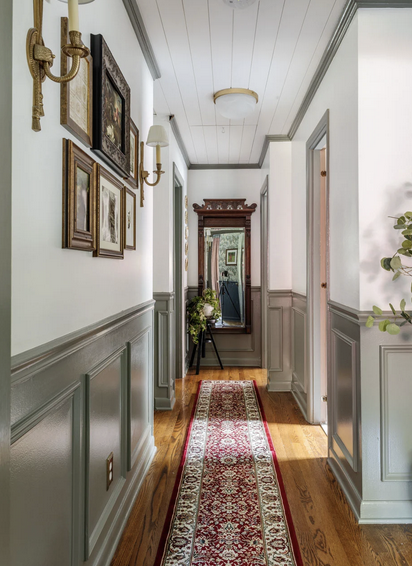

In [12]:
# Provide your own file path here:
img_path = "image2.png"  # e.g., "/content/cat.jpg"
image = Image.open(img_path)

print("BLIP caption:")
print(caption_image(image))
display(image)


In [13]:
print(caption_image(image, prompt="A concise description of the scene:"))


a concise description of the scene :s on the wall
